In [1]:
import os
import sys
from sys import platform
import matplotlib.pyplot as plt
import pandas as pd
import datetime
BASE_PATH = '\\'.join(os.getcwd().split('\\')[:-1]) + '\\' if platform == 'win32' else '/'.join(os.getcwd().split('/')[:-1]) + '/'
sys.path.append(BASE_PATH)
from src.config import get_global_config
_config = get_global_config()
EMISSION_FILE_PATH = BASE_PATH + _config.get('EMISSION_FILE_PATH')

In [2]:
df = pd.read_csv(EMISSION_FILE_PATH)
emissions = df[['duration', 'emissions', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy', 'gpu_energy', 'ram_energy']]
geo = df[['country_name', 'country_iso_code', 'region', 'longitude', 'latitude']]
hw = df[['os', 'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model', 'ram_total_size']]

In [3]:
emissions.sample(n=3)

,duration,emissions,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy
46,217.011388,0.000193,2.5147,0.0078,0.221117,0.000098,0.000422,0.000047
36,214.790343,0.000211,0.0495,0.0044,0.258533,0.000047,0.000537,0.000037
33,215.106277,0.000220,0.3234,0.1367,0.256365,0.000074,0.000538,0.000035


In [4]:
geo.sample(n=3)

,country_name,country_iso_code,region,longitude,latitude
38,Italy,ITA,apulia,16.8547,41.1122
15,Italy,ITA,apulia,16.8547,41.1122
28,Italy,ITA,apulia,16.8547,41.1122


In [5]:
hw.sample(n=3)

,os,cpu_count,cpu_model,gpu_count,gpu_model,ram_total_size
40,macOS-13.6.2-arm64-arm-64bit,12,Apple M2 Max,1,Apple M2 Max,64.0
18,macOS-13.6.2-arm64-arm-64bit,12,Apple M2 Max,1,Apple M2 Max,64.0
58,macOS-13.6.2-arm64-arm-64bit,12,Apple M2 Max,1,Apple M2 Max,64.0


In [6]:
models = ['_'.join(p.split('_')[:-1]) for p in df['project_name'].values]
models = sorted(list(set(models)))
metrics = {
	'25_0.001': {'acc': 65.76978, 'iou': 62.73377},
	'25_0.0001': {'acc': 67.96904, 'iou': 64.80124},
	'25_0.0005': {'acc': 74.61385, 'iou': 69.4009},
	'50_0.001': {'acc': 89.71403, 'iou': 83.93084},
	'50_0.0001': {'acc': 90.72147, 'iou': 85.21845},
	'50_0.0005': {'acc': 83.73148, 'iou': 78.02966}
}
results = {}
for k,m in enumerate(models):
	current = df[df['project_name'].str.contains(m)]
	id = '_'.join(current['project_name'].iloc[0].split('_')[1:3])
	results[id] = {
		'num_epochs': current['project_name'].iloc[0].split('_')[0],
		'batch_size': current['project_name'].iloc[0].split('_')[1],
		'learning_rate': current['project_name'].iloc[0].split('_')[2],
		'emissions': current['emissions'].sum() * 1000,
		'duration': current['duration'].sum(),
		'acc': metrics[id]['acc'],
		'iou': metrics[id]['iou'],
		'cpu_power': current['cpu_power'].values,
		'gpu_power': current['gpu_power'].values,
		'ram_power': current['ram_power'].values,
		'cpu_energy': current['cpu_energy'].values,
		'gpu_energy': current['gpu_energy'].values,
		'ram_energy': current['ram_energy'].values,
	}

In [7]:
print(''.join(['> ' for i in range(52)]))
print(f'\n{"N":<5}{"EPOCHS":<8}{"BATCH":<8}{"LR":<10}{"EMISSIONS(g)":<15}{"DURATION(h)":<15}{"ACC.(%)":<10}{"IOU(%)":<10}{"POWER(W)":<10}{"ENERGY(kWh)":<10}\n')
print(''.join(['> ' for i in range(52)]))
for k, v in enumerate(results.values()):
	if k == 3:
		print(f'\n\033[1m{k+1:<5}\033[0m\033[1m{v["num_epochs"]:<8}\033[0m\033[1m{v["batch_size"]:<8}\033[0m\033[1m{v["learning_rate"]:<10}\033[0m\033[1m{v["emissions"]:<15.6f}\033[0m\033[1m{str(datetime.timedelta(seconds=int(v["duration"]))):<15}\033[0m\033[1m{v["acc"]:<10.2f}\033[0m\033[1m{v["iou"]:<10.2f}\033[0m\033[1m{v["cpu_power"].sum() + v["gpu_power"].sum() + v["ram_power"].sum():<10.2f}\033[0m\033[1m{v["cpu_energy"].sum() + v["gpu_energy"].sum() + v["ram_energy"].sum():<10.4f}\033[0m')
	else:
		print(f'\n{k+1:<5}{v["num_epochs"]:<8}{v["batch_size"]:<8}{v["learning_rate"]:<10}{v["emissions"]:<15.6f}{str(datetime.timedelta(seconds=int(v["duration"]))):<15}{v["acc"]:<10.2f}{v["iou"]:<10.2f}{v["cpu_power"].sum() + v["gpu_power"].sum() + v["ram_power"].sum():<10.2f}{v["cpu_energy"].sum() + v["gpu_energy"].sum() + v["ram_energy"].sum():<10.4f}')

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

N    EPOCHS  BATCH   LR        EMISSIONS(g)   DURATION(h)    ACC.(%)   IOU(%)    POWER(W)  ENERGY(kWh)

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

1    10      25      0.0001    2.182910       0:35:52        67.97     64.80     5.10      0.0064    

2    10      25      0.0005    2.170745       0:35:51        74.61     69.40     5.71      0.0064    

3    10      25      0.001     2.230878       0:35:55        65.77     62.73     5.07      0.0065    

4    10      50      0.0001    2.037327       0:36:08        90.72     85.22     9.30      0.0060    

5    10      50      0.0005    2.121113       0:36:06        83.73     78.03     9.04      0.0062    

6    10      50      0.001     2.054978       0:36:06        89.71     83.93     4.41      0.0060    


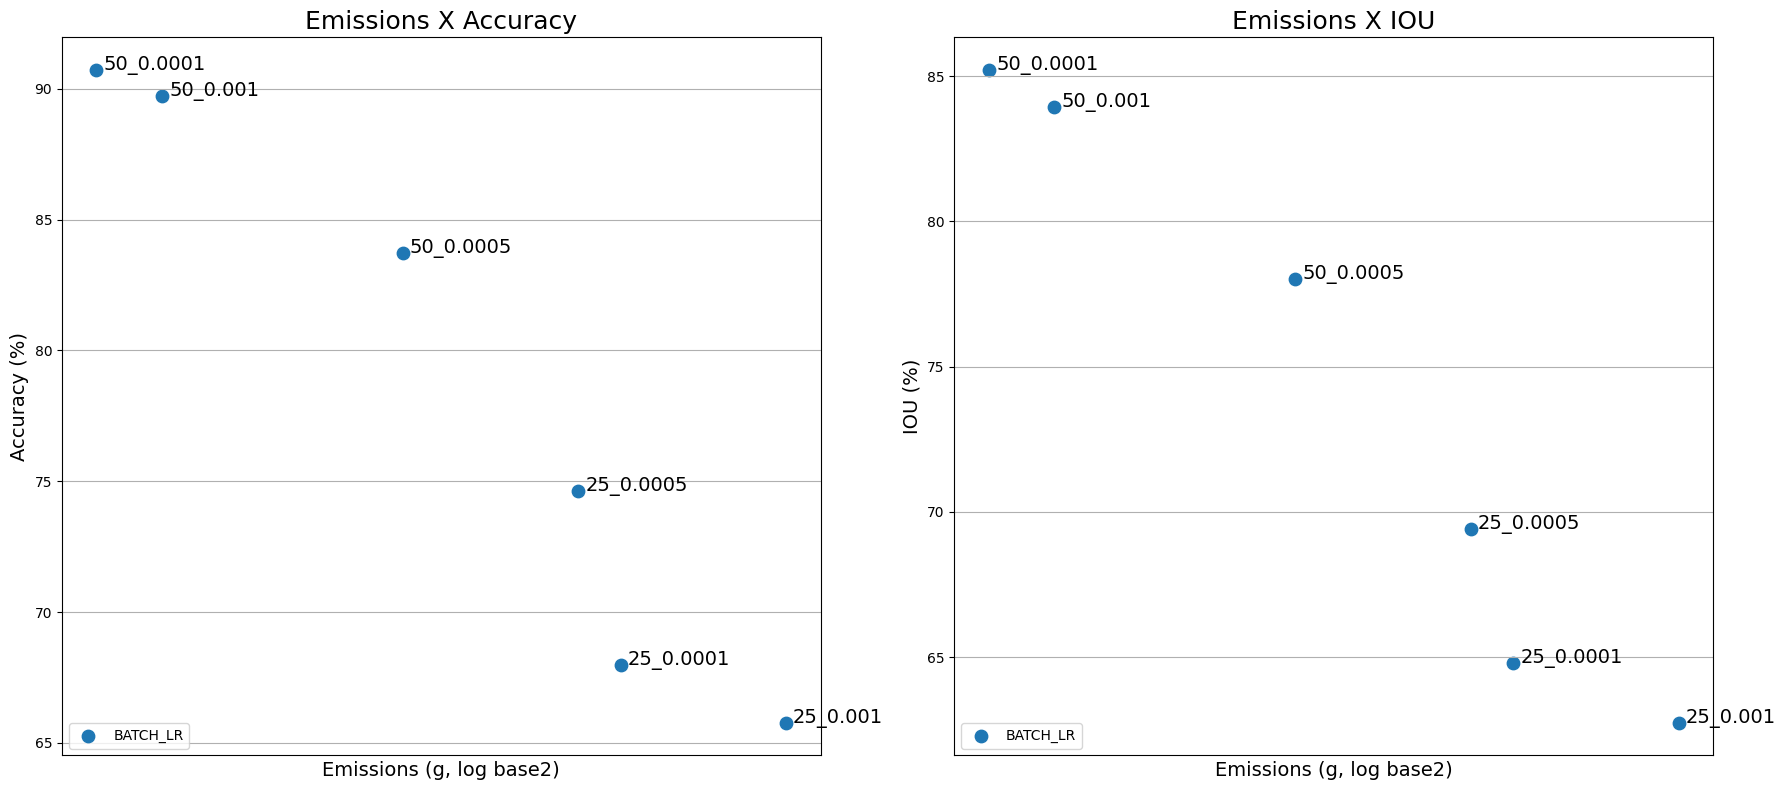

In [8]:
labels = [['Emissions','Accuracy'],['Emissions','IOU']]
plotted = [
	[[r['emissions'] for r in results.values()],[r['acc'] for r in results.values()]],
	[[r['emissions'] for r in results.values()],[r['iou'] for r in results.values()]]
]

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
for k, ax in enumerate(axs):
	ax.scatter(plotted[k][0], plotted[k][1], label='BATCH_LR', s=80)
	ax.set_title(labels[k][0]+' X '+labels[k][1], fontsize = 18)
	ax.set_xlabel(labels[k][0] + ' (g, log base2)', fontsize=14)
	ax.set_ylabel(labels[k][1] + ' (%)', fontsize=14)
	ax.legend(loc='lower left')
	ax.grid()
	for i, (xi, yi) in enumerate(zip(plotted[k][0], plotted[k][1])):
		ax.text(xi+.002, yi+.002, list(results.keys())[i], fontsize=14)
	ax.set_xscale('log', base=2)
fig.tight_layout()
plt.show()

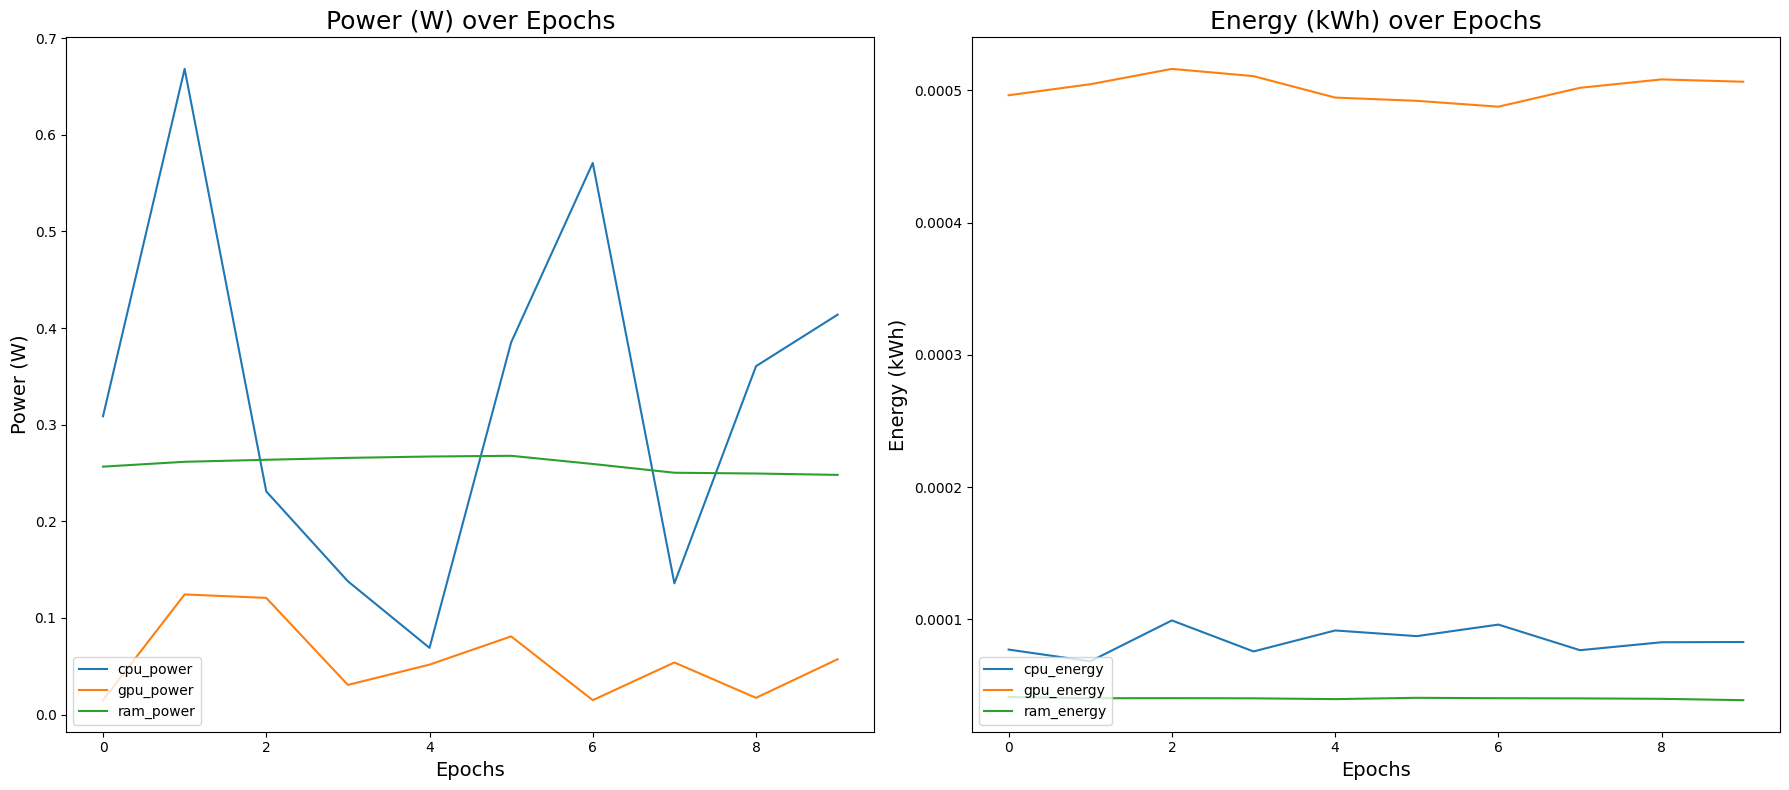

In [9]:
d = [
	['cpu_power', 'gpu_power', 'ram_power'],
	['cpu_energy', 'gpu_energy', 'ram_energy']
]
l = ['Power (W)', 'Energy (kWh)']
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
for k, ax in enumerate(axs):
	ax.plot([j / 6 for j in list(map(sum, zip(*[i[d[k][0]] for i in results.values()])))], label=d[k][0])
	ax.plot([j / 6 for j in list(map(sum, zip(*[i[d[k][1]] for i in results.values()])))], label=d[k][1])
	ax.plot([j / 6 for j in list(map(sum, zip(*[i[d[k][2]] for i in results.values()])))], label=d[k][2])

	ax.set_title(l[k]+' over Epochs', fontsize = 18)
	ax.set_xlabel('Epochs', fontsize=14)
	ax.set_ylabel(l[k], fontsize=14)
	ax.legend(loc='lower left')

fig.tight_layout()
plt.show()